# Исследование объявлений о продаже квартир

**Цель исследования:**

По имеющимся данным архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет, установить параметры, которые характеризуют рыночную стоимость объектов недвижимости. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Открытие данных

In [78]:
# импорт необходимых для работы библиотек
import matplotlib.pyplot as plt
import pandas as pd

In [79]:
# стиль графиков
plt.style.use('ggplot')

Загрузим первые строки датасета для проверки разделителя значений.

In [80]:
# применим метод set_option для отображения всех столбцов
pd.set_option('mode.chained_assignment', None)
# загрузим первые три строки датасета
df = pd.read_csv('real_estate_data.csv', nrows = 3)
df

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...


Данные склеились в одну строку. Это произошло из-за того, что разделителем значений в таблице является _знак табуляции (\t)_. Применим параметр _sep_, чтобы привести таблицу к нормальному виду.

In [81]:
# загрузим датасет с нужным разделителем
df = pd.read_csv('real_estate_data.csv', sep='\t')
# вывод пяти случайных строк
df.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9182,11,2400000.0,35.0,2017-01-26T00:00:00,1,2.7,4.0,20.0,1,False,...,9.0,1.0,Шлиссельбург,NaN,NaN,NaN,NaN,NaN,NaN,329.0
22844,12,5550000.0,40.0,2019-04-23T00:00:00,1,2.8,25.0,18.0,17,NaN,...,8.6,NaN,Санкт-Петербург,13594.0,16186.0,0.0,NaN,0.0,NaN,NaN
13520,7,5900000.0,83.0,2017-08-15T00:00:00,3,NaN,4.0,56.0,4,NaN,...,9.0,1.0,Колпино,24056.0,29842.0,1.0,520.0,0.0,NaN,185.0
19281,9,5400000.0,39.4,2018-08-07T00:00:00,1,2.6,25.0,17.5,21,NaN,...,10.3,NaN,Санкт-Петербург,15533.0,14329.0,1.0,1477.0,1.0,392.0,249.0
4319,13,3600000.0,27.0,2017-12-07T00:00:00,0,2.7,21.0,20.5,16,NaN,...,NaN,NaN,Санкт-Петербург,10788.0,13087.0,0.0,NaN,0.0,NaN,323.0


Теперь таблица выглядит правильно. Проверим общую информацию о датасете.

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

В таблице есть 22 столбца. Согласно документации к данным:
* _airports_nearest_ — расстояние до ближайшего аэропорта в метрах (м)
* _balcony — число_ балконов
* _ceiling_height_ — высота потолков (м)
* _cityCenters_nearest_ — расстояние до центра города (м)
* _days_exposition_ — сколько дней было размещено объявление (от публикации до снятия)
* _first_day_exposition_ — дата публикации
* _floor_ — этаж
* _floors_total_ — всего этажей в доме
* _is_apartment_ — апартаменты (булев тип)
* _kitchen_area_ — площадь кухни в квадратных метрах (м²)
* _last_price_ — цена на момент снятия с публикации
* _living_area_ — жилая площадь в квадратных метрах (м²)
* _locality_name_ — название населённого пункта
* _open_plan_ — свободная планировка (булев тип)
* _parks_around3000_ — число парков в радиусе 3 км
* _parks_nearest_ — расстояние до ближайшего парка (м)
* _ponds_around3000_ — число водоёмов в радиусе 3 км
* _ponds_nearest_ — расстояние до ближайшего водоёма (м)
* _rooms_ — число комнат
* _studio_ — квартира-студия (булев тип)
* _total_area_ — площадь квартиры в квадратных метрах (м²)
* _total_images_ — число фотографий квартиры в объявлении

В названиях колонок видны нарушения стиля:
1. Строчные буквы сочетаются с прописными.
2. Не применяется "змеиный_регистр"

Количество значений в столбцах различается. Значит в данных присутствуют пропуски.

### Вывод

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

Для дальнейшей работы необходимо выполнить предобработку данных:
* Исправить стили заголовков столбцов
* Обработать пропуски
* Найти и удалить дубликаты
* Произвести замену типов данных

### Стиль заголовков

В названиях столбцов видны нарушения стиля:
1. Строчные буквы сочетаются с прописными.
2. Не применяется "змеиный_регистр"

Изменим названия столбцов `cityCenters_nearest`, `parks_around3000`, `ponds_around3000`.

In [83]:
# используем метод rename
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                   'parks_around3000': 'parks_around_3000', 
                   'ponds_around3000': 'ponds_around_3000'})
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Теперь стиль названий столбцов правильный.

### Обработка пропущенных значений

In [84]:
# найдем количество пропусков по столбцам
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Многие столбцы содержат пропуски. Выделим возможные причины их появления:

возможно владельцы квартир не имеют данных об этих параметрах:
* `ceiling_height` 
* `floors_total`
* `living_area` 
* `kitchen_area`

Значения получены автоматически на основе картографических данных, возможно наличие пропусков связано с проблемой определения геолокации:
* `airports_nearest`
* `city_centers_nearest`
* `parks_around_3000`
* `parks_nearest`
* `ponds_around_3000`
* `ponds_nearest` 

`balcony` - вероятно балкона нет<br>
`days_exposition` - скорее всего квартира еще находится в продаже.<br>
`is_apartment` - возможно данный пункт был необязателен при составлении объявления, и многие его не отмечали.

Заменить пропуски практически во всех столбцах не представляется возможным, из-за уникальности значений. Но можно заменить пропуски в столбце `balcony` - пропуск означает отсутствие балкона. Заменим пропуски на 0.

In [85]:
df['balcony'] = df['balcony'].fillna(0)
print(f'Количество пропусков в столбце "balcony": {df["balcony"].isna().sum()}')

Количество пропусков в столбце "balcony": 0


### Обработка дубликатов

проверка наличия явных строк-дубликатов

In [86]:
print(f'Явных строк-дубликатов: {df.duplicated().sum()}')

Явных строк-дубликатов: 0


Проверка уникальных значений в столбце с `locality_name`

In [87]:
print('Уникальных значений в столбце с названием населенного пункта:', len(df['locality_name'].unique()))
df['locality_name'].sort_values().unique()

Уникальных значений в столбце с названием населенного пункта: 365


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Слово поселок написано по-разному: _поселок_ и _посёлок_. Необходимо привести это слово к одному виду.

In [88]:
# используем метод str.replace
df['locality_name'] = df['locality_name'].str.replace('поселок', 'посёлок')
print('Уникальных значений в столбце с названием населенного пункта:', len(df['locality_name'].unique()))

Уникальных значений в столбце с названием населенного пункта: 331


Дубликаты в столбце `locality_name` были удалены. Проверим не появились ли явные строки-дубликаты.

In [89]:
print(f'Явных строк-дубликатов: {df.duplicated().sum()}')

Явных строк-дубликатов: 0


### Замена типа данных

В следующих столбцах необходимо выполнить замену типа данных:
* `first_day_exposition ` на datetime
* `floors_total`, `balcony `, `days_exposition` на int

In [90]:
#замена типа данных в столбце first_day_exposition на datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S' )

In [91]:
#замена типа данных на int в столбцах floors_total, balcony и days_exposition
df[['floors_total', 'balcony', 'days_exposition']] = (df[['floors_total', 'balcony', 'days_exposition']]
                                                      .round()
                                                      .astype('Int64')
                                                     )
df.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     Int64
living_area                    float64
floor                            int64
is_apartment                    object
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          Int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                  Int64
dtype: object

### Вывод

Были выявлены пропуски. В столбце `balcony` пропуски были заменены на 0. В остатных столбцах пропуски не обрабатывались.

Были выявлены и обработаны дубликаты в столбце `locality_name`.

Замена типов данных в столбцах `floors_total`, `balcony `, `days_exposition` и `first_day_exposition ` прошла успешно.

## Расчёты и добавление результатов в таблицу

Необходимо провести расчеты и добавить в таблицу:
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

### Расчет цены квадратного метра

Для расчета цены квадратного метра нужно стоимость квартиры разделить на ее площадь. 

In [92]:
# создадим новый столбец для расчета и приведем полученные значения к целочисленному типу данных
df['m_2_price'] = (df['last_price'] / df['total_area']).round().astype('Int64')
df[['last_price', 'total_area', 'm_2_price']].head()

,last_price,total_area,m_2_price
0,13000000.0,108.0,120370
1,3350000.0,40.4,82921
2,5196000.0,56.0,92786
3,64900000.0,159.0,408176
4,10000000.0,100.0,100000


### Получение дня недели, месяца и года публикации объявления

Нужно добавить три новых столбца с днем недели, месяцем и годом публикации объявления. Применим метод _`dt()`_.

In [93]:
#новый столбец с днем недели
df['weekday'] = df['first_day_exposition'].dt.weekday
#новый столбец с месяцем
df['month'] = df['first_day_exposition'].dt.month
#новый столбец с годом
df['year'] = df['first_day_exposition'].dt.year
df[['first_day_exposition', 'weekday', 'month', 'year']].head()

,first_day_exposition,weekday,month,year
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015
3,2015-07-24,4,7,2015
4,2018-06-19,1,6,2018


### Поиск этажа квартиры

Нужно создать столбец с тремя вариантами значений - первый, последний и другой в зависимости от этажа, на котором расположена квартира. Для этого создадим функцию для распределения квартир по категориям.

In [94]:
def which_floor(row):
    total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == total:
        return 'последний'
    return 'другой'

# создадим новый столбец с применением метода apply
df['kind_floor'] = df.apply(which_floor,  axis=1)
df[['floors_total', 'floor', 'kind_floor']].head()

,floors_total,floor,kind_floor
0,16,8,другой
1,11,1,первый
2,5,4,другой
3,14,9,другой
4,14,13,другой


### Расчет соотношения жилой и общей площади; отношение площади кухни к общей

Нужно создать столбцы с отношением жилой площади к общей  и площади кухни к общей.

In [95]:
# создание столбца "жилая площадь/общая площадь"
df['living_total_ratio'] = (df['living_area'] / df['total_area']).round(2)
# создание столбца "площадь кухни/общая площадь"
df['kitchen_total_ratio'] = (df['kitchen_area'] / df['total_area']).round(2)
# вывод результата
df[['total_area', 'living_area', 'kitchen_area', 'living_total_ratio', 'kitchen_total_ratio']].head()

,total_area,living_area,kitchen_area,living_total_ratio,kitchen_total_ratio
0,108.0,51.0,25.0,0.47,0.23
1,40.4,18.6,11.0,0.46,0.27
2,56.0,34.3,8.3,0.61,0.15
3,159.0,NaN,NaN,NaN,NaN
4,100.0,32.0,41.0,0.32,0.41


### Вывод

Были созданы и добавлены в таблицу следующие столбцы:
* `m_2_price` - цена квадратного метра 
* `weekday` - день недели публикации объявления
* `month` - месяц публикации объявления
* `year` - год публикации объявления
* `kind_floor` - этаж (первый, последний или другой)
* `living_total_ratio` - отношение жилой площади к общей
* `kitchen_total_ratio` - отношение площади кухни к общей площади

## Исследовательский анализ данных

### Изучение параметров и построения гистограмм

Необходимо построить гистограммы и изучить полученные результаты для следующих параметров: _площадь, цена, число комнат, высота потолков_. 

#### Построение гистограммы площади квартиры и изучение результата

Общая статистическая информация о столбце `total_area`.

In [96]:
# сводка по данным столбца 'total_area'
print(df['total_area'].describe())

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


Данные расположились в диапозоне **от 12 до 900 $м^2$**. Площадь квартиры в 12 $м^2$ кажется слишком маленькой и не соответствующей действительности. площадь 900 $м^2$ вполне реальна. Медиана и среднее разнятся немного, что говорит о **небольшом количестве выбросов**. **75% квартир меньше 70 $м^2$**.



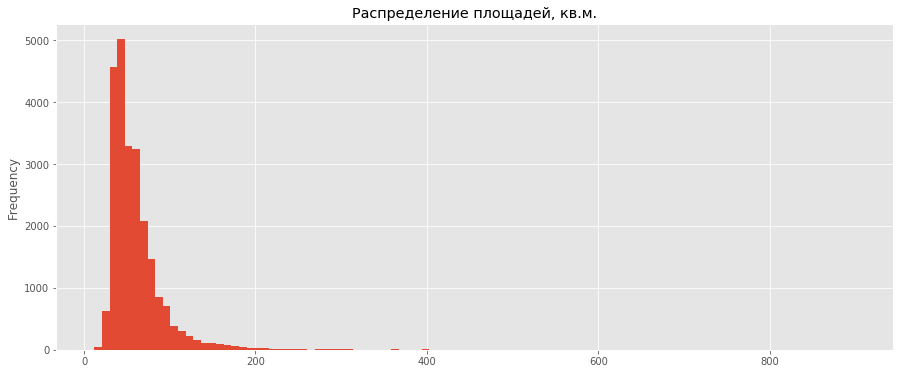

In [97]:
# построение гистограммы для распределения значений площадей квартир
df.plot(title='Распределение площадей, кв.м.', 
        kind='hist', 
        y='total_area',
        bins=100, 
        grid=True, 
        figsize=(15, 6),
        legend=False
       )
plt.show()

По гистограмме можно заметить, что квартир с площадью близкой к минимуму немного, а квартир площадью больше 300 $м^2$ практически нет.

Построим гистограмму в диапазоне от 0 до 300 $м^2$.

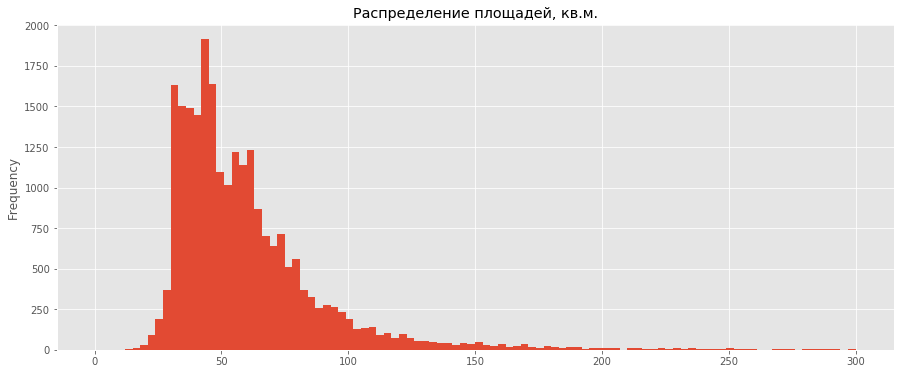

In [98]:
df.plot(title='Распределение площадей, кв.м.', 
        kind='hist', 
        y='total_area', 
        bins=100, 
        range=(0, 300), 
        figsize=(15, 6),
        grid=True, 
        legend=False
       )
plt.show()

Ощутимый подъем виден после 25 $м^2$. После 200 $м^2$ наклон  пологий, а частота значений очень мала. При этом площадь квартир от 15 до 25 $м^2$ можно считать реальной. Поэтому найдем каков процент квартир от **15 до 200 $м^2$**.

In [99]:
print('Количество квартир площадью меньше 15 кв.м.: {:.2%}'
      .format(len(df.query('total_area < 15')) / df.shape[0]))

print('Количество квартир площадью больше 200 кв.м.: {:.2%}'
      .format(len(df.query('total_area > 200')) / df.shape[0]))

Количество квартир площадью меньше 15 кв.м.: 0.03%
Количество квартир площадью больше 200 кв.м.: 0.96%


Таких квартир в сумме около процента. В связи с этим квартиры с **площадью меньше 15 $м^2$ и больше 200 $м^2$ можно не учитывать.**

#### Построение гистограммы цены квартиры и изучение результата

Создадим столбец с ценой в миллионах рублей для более удобного отображения статистики и гистограммы. 

In [100]:
df['price_mln'] = df['last_price'] / 1e+6
df[['last_price', 'price_mln']].head()

,last_price,price_mln
0,13000000.0,13.000
1,3350000.0,3.350
2,5196000.0,5.196
3,64900000.0,64.900
4,10000000.0,10.000


In [101]:
# сводка по данным столбца 'price_mln'
df['price_mln'].describe()

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: price_mln, dtype: float64

Диапазон цен: **от 12190 руб. до 763 млн. руб**. Минимальная цена кажется нереальной. На величину среднего сильно влияют выбросы, поэтому разница с медианой велика. **75% квартир стоят до 6.8 млн. руб**.

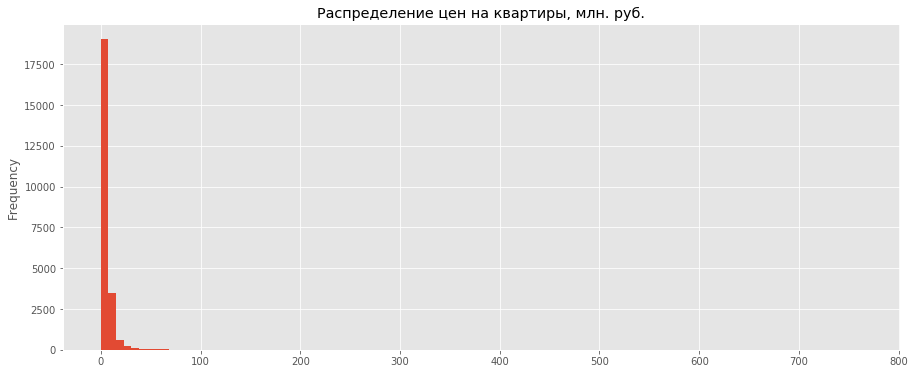

In [102]:
df.plot(title='Распределение цен на квартиры, млн. руб.', 
        kind='hist', 
        y='price_mln', 
        bins=100, 
        grid=True,
        figsize=(15, 6),
        legend=False
       )
plt.show()

Почти все значения не превышают 50 млн. руб. Но данная гистограмма не совсем наглядна из-за выбросов. Построим гистограмму в диапазоне от 0 до 50.

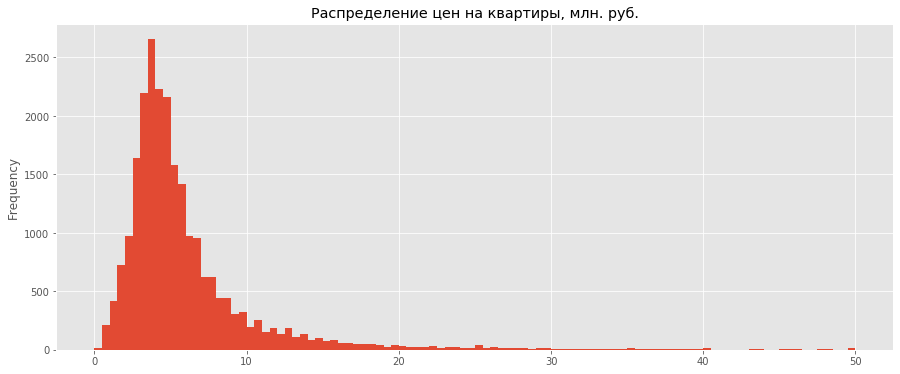

In [103]:
df.plot(title='Распределение цен на квартиры, млн. руб.', 
        kind='hist', 
        y='price_mln', 
        bins=100, 
        range=(0, 50),
        grid=True,
        figsize=(15, 6),
        legend=False
       )
plt.show()

Большинство квартир стоят меньше 10 млн. руб. Определенный процент цен лежит в диапазоне от 10 до 20 млн. руб. После 30 график стремится к нулю (по-несколько квартир на каждый миллион). **За верхнее значение можно принять 30 млн. руб.**

Построим гистограмму в диапазоне от 0 до 10.

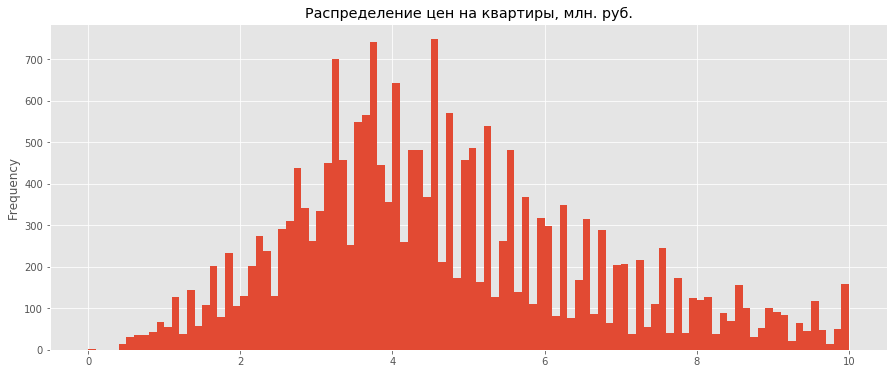

In [104]:
df.plot(title='Распределение цен на квартиры, млн. руб.', 
        kind='hist', 
        y='price_mln', 
        bins=100, 
        range=(0, 10),
        grid=True,
        figsize=(15, 6),
        legend=False
       )
plt.show()

Квартир до 1 млн. руб. мало. Вероятно это варианты, при которых квартира расположена в небольшом населенном пункте. При таких вариантах цена в 1 млн. руб. вполне возможна. Но вот цены ниже 700 тыс. рублей маловероятны.

**Отбросим цены до 700 тыс. руб**. Найдем процент исключенных квартир.

In [105]:
print(f'Количество квартир ценой меньше 700 тыс.руб.: {len(df.query("price_mln < 0.7")) / df.shape[0]:.2%}')
print(f'Количество квартир ценой больше 30 млн.руб.: {len(df.query("price_mln > 30")) / df.shape[0]:.2%}')

Количество квартир ценой меньше 700 тыс.руб.: 0.29%
Количество квартир ценой больше 30 млн.руб.: 1.33%


#### Построение гистограммы количества комнат и изучение результата

In [106]:
# сводка по данным столбца 'rooms'
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Данные лежат в диапазоне от 0 до 19. Среднее и медиана практически равны, что говорит о небольшом количестве выбросов. 75% квартир имеют не больше 3-х комнат.
Построим гистограмму.

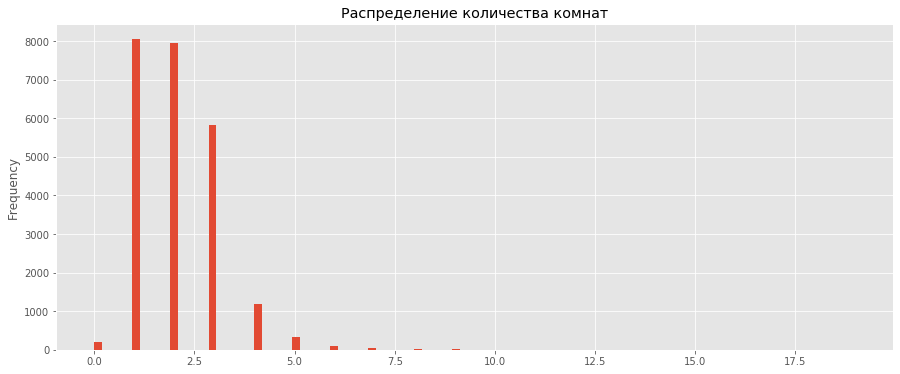

In [107]:
df.plot(title='Распределение количества комнат', 
        kind='hist', 
        y='rooms', 
        bins=100, 
        grid=True,
        figsize=(15, 6),
        legend=False
       )
plt.show()

Гистограмма подтверждает, что большинство квартир имеют **от 1-ой до 3-х комнат**. около тысячи - 4 комнаты. Несколько сотен квартир с 5-ю комнатами. **Совсем мало квартир с количеством комнат больше 5-ти**. 
Также есть определенное количество **квартир "без комнат"**. Скорее всего это студии. Проверим данное предположение. 

In [108]:
# найдем отношение студий к квартирам "без комнат"
print(f'Отношение студий к квартирам "без комнат": {len(df.query("rooms == 0 and studio")) / len(df.query("rooms == 0")):.0%}')

Отношение студий к квартирам "без комнат": 70%


In [109]:
len(df.query("rooms == 0 and studio")) / len(df.query("rooms == 0"))

0.700507614213198

Результат означает, что 70% квартир "без комнат" - это студии. Но так как таких значений очень мало их можно не учитывать при дальнейших расчетах.

**Таким образом можно отбросить квартиры с количеством комнат меньше 1 и больше 5.**

In [110]:
print(f'Квартир без комнат: {len(df.query("rooms < 1")) / df.shape[0]:.2%}')
print(f'квартир с количеством комнат больше 5-ти: {len(df.query("rooms > 5")) / df.shape[0]:.2%}')

Квартир без комнат: 0.83%
квартир с количеством комнат больше 5-ти: 0.82%


#### Построение гистограммы высоты потолка и изучение результата

In [111]:
# сводка по данным столбца 'ceiling_height'
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Высота потолков варируется в диапазоне **от 1 до 100 метров**. Среднее и медиана имеют близкие значения. **75% квартир имеют высоту потолков не больше 2.8 метров**.

Построим гистограмму.

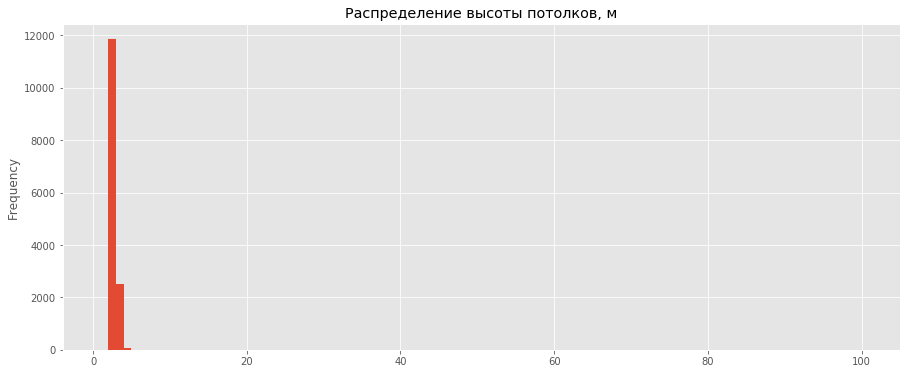

In [112]:
df.plot(title='Распределение высоты потолков, м', 
        kind='hist', 
        y='ceiling_height', 
        bins=100, 
        grid=True,
        figsize=(15, 6),
        legend=False
       )
plt.show()

Данная диаграмма не информативна из-за выбросов. Построим новую в диапазоне от 1 до 5 метров.

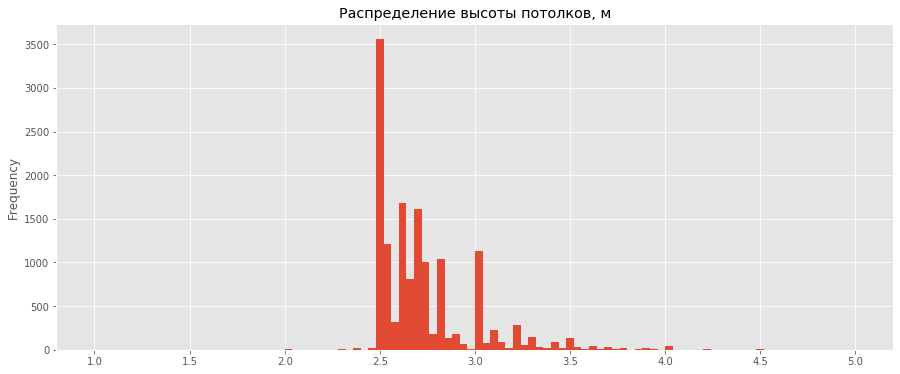

In [113]:
df.plot(title='Распределение высоты потолков, м', 
        kind='hist', 
        y='ceiling_height', 
        bins=100, 
        grid=True,
        range=(1, 5),
        figsize=(15, 6),
        legend=False
       )
plt.show()

большинство значений сконцентрировано в диапазоне от 2,5 до 3-х метров. Квартиры с высотой потолка свыше 4-х метров встречаются крайне редко. **Поэтому примем верхнее значение равное 3,5 метра.**

Из интернет-источников: "минимальной нормой в России считается высота потолка 2,4 метра". Эта информация подтверждается гистограммой: значений меньше 2,5 очень мало. **За нижнее значение примем 2,4 метра.** 

In [114]:
print(f'Квартир с высотой потолка меньше 2,4 метра: {len(df.query("ceiling_height < 2.4")) / df.shape[0]:.2%}')
print(f'Квартир с высотой потолка больше 3,5 метра: {len(df.query("ceiling_height > 3.5")) / df.shape[0]:.2%}')

Квартир с высотой потолка меньше 2,4 метра: 0.09%
Квартир с высотой потолка больше 3,5 метра: 1.28%


#### Время продажи квартиры

Посмотрим на общую статистику о времени продажи квартиры

In [115]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее значение почти в два раза больше чем медиана. Сами значения расположились в широком диапозоне **от 1 дня до 1580 дней**. При этом **большая часть** продаж длилась **меньше 200 дней**. Построим гистограмму для более наглядного вида.

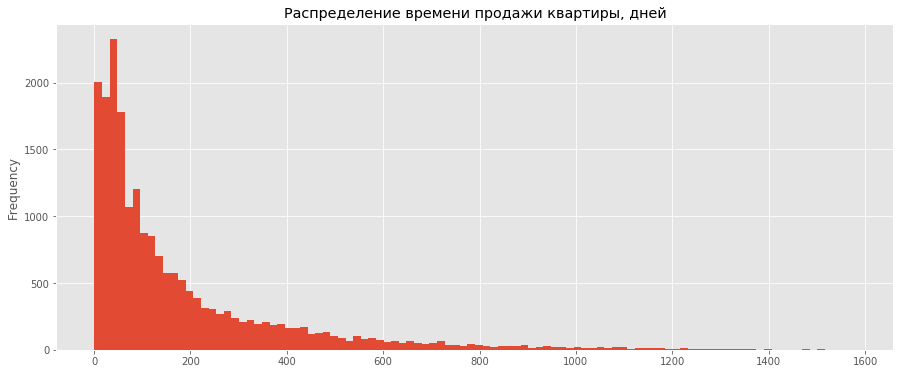

In [116]:
df.plot(title='Распределение времени продажи квартиры, дней', 
        kind='hist', 
        y='days_exposition', 
        bins=100, 
        grid=True,
        figsize=(15, 6),
        legend=False
       )
plt.show()

Действительно большая часть данных расположилась в диапазоне **от 1 до 200 дней**. Продажи длительностью **больше 800 дней очень редки**, а **больше 1200 практически сливается с нулем**.

**Примем верхнюю границу продолжительности продаж равную 1000 дням.** Это больше 3-х лет. 

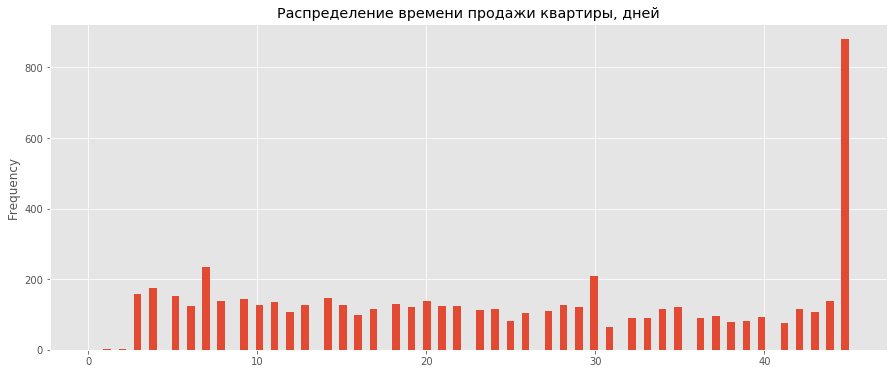

In [117]:
df.plot(title='Распределение времени продажи квартиры, дней', 
        kind='hist', 
        y='days_exposition', 
        bins=100, 
        grid=True, 
        range=(0, 45),
        figsize=(15, 6),
        legend=False
       )
plt.show()

В основном, в промежутке до 45 дней каждый день было не больше 200 снятий объявлений. Но в сумме эти значения занимают 25% всех данных. Продажи за несколько дней кажутся подозрительными, поэтому отбросим значения **меньше недели**.

In [118]:
print(f'Время продажи меньше недели: {(len(df.query("days_exposition < 7"))/ df.shape[0]):.2%}')
print(f'Время продажи больше 1000 дней: {(len(df.query("days_exposition > 1000"))/ df.shape[0]):.2%}')

Время продажи меньше недели: 2.59%
Время продажи больше 1000 дней: 1.16%


Теперь можно убрать из таблицы данные, которые были исключены.

In [119]:
# сначала сделаем срез по столбцам total_area, price_mln, rooms
df_good = df.query('25 <= total_area <= 200 and 0.8 <= price_mln <= 30 and 1 <= rooms <= 5')

# так как в столбце ceiling_height есть пропуски, их нужно также указать
df_good = df_good[(df_good['ceiling_height'].isna()) | 
                  ((df_good['ceiling_height'] >= 2.4) & 
                   (df_good['ceiling_height'] <= 3.5))]

# так как в столбце days_exposition есть пропуски, их нужно также указать
df_good = df_good[(df_good['days_exposition'].isna()) | 
                  ((df_good['days_exposition'] >= 7) & 
                   (df_good['days_exposition'] <= 1000))]

print('отношение очищенных данных к сырым: {:.2}'.format(df_good.shape[0] / df.shape[0]))

отношение очищенных данных к сырым: 0.91


#### Вывод

Таблица была проанализирована по следующим параметрам: *площадь, цена, число комнат, высота потолков и время продажи*. После этого, таблица была очищена от редких и выбивающихся значений. **Отношение очищенных данных к сырым: 0.91.**

### Какие факторы больше всего влияют на стоимость квартиры?

Нужно проверить, зависит ли цена от площади, числа комнат, удалённости от центра, этажа, даты размещения.

#### Проверка взаимоствязи параметров с помощью корреляции Пирсона

In [120]:
df_good[['price_mln', 'rooms', 'total_area', 'city_centers_nearest']].corr()

,price_mln,rooms,total_area,city_centers_nearest
price_mln,1.000000,0.472965,0.780612,-0.341044
rooms,0.472965,1.000000,0.779658,-0.142521
total_area,0.780612,0.779658,1.000000,-0.210647
city_centers_nearest,-0.341044,-0.142521,-0.210647,1.000000


Сильнее всего цена коррелирует с площадью квартиры (**0,78**). Это вполне логично - чем больше площадь, тем дороже квартира. 
С количеством комнат цена коррелирует слабее (**0,47**). Также есть слабая отрицательная корреляция с близостью квартиры к центру (**-0,34**).

Для более наглядной картины построим диаграммы рассеяния для каждого параметра.

#### Диаграмма рассеяния для пары - близость квартиры к центру / стоимость квартиры

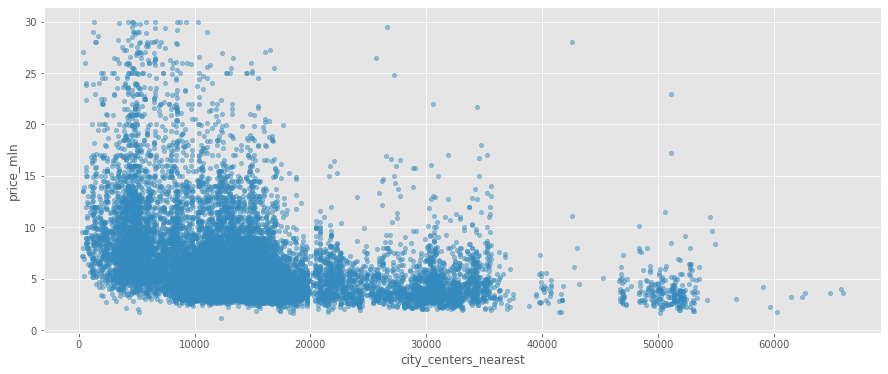

In [121]:
# зависимость цены от близости квартиры к центру
df_good.plot(x='city_centers_nearest', 
             y='price_mln', 
             kind='scatter', 
             figsize=(15, 6), 
             grid=True, 
             alpha=0.5
            )
plt.show()

Большое количество квартир ценой **до 5 млн.руб** располагается как вблизи так и вдали от центра. Но при этом чем ближе к центру, тем больше становится квартир стоимостью **более 5 млн. руб**. А практически все квартиры ценой свыше **10 млн. руб.** располагаются на расстоянии **до 20 км**. Большинство квартир ценой **свыше 20 млн. руб. в 10 км от центра**.

**Таким образом, можно сделать вывод: чем ближе к центру, тем больше дорогих квартир.**

#### Диаграмма рассеяния для пары количество комнат / стоимость квартиры

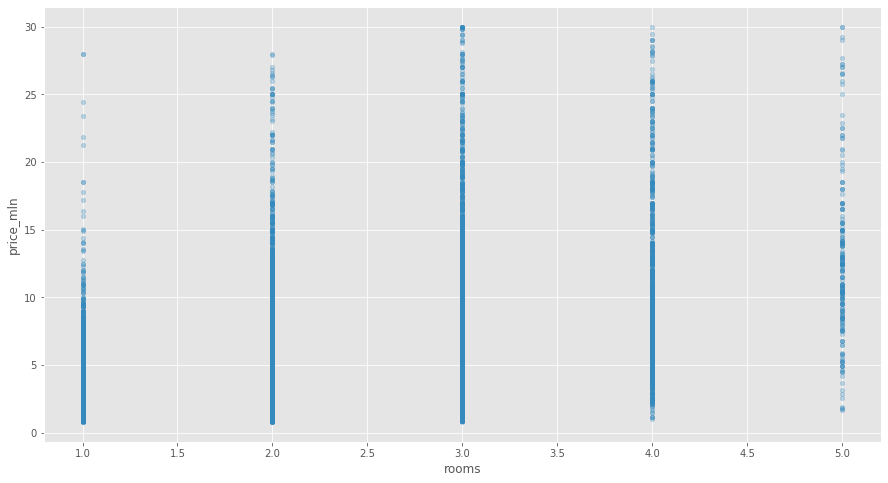

In [122]:
df_good.plot(x='rooms', 
             y='price_mln', 
             kind='scatter', 
             figsize=(15, 8), 
             grid=True, 
             alpha=0.3
            )
plt.show()

**Большинство квартир стоят меньше 10 млн руб. При этом с увеличением комнат заметен рост числа квартир стоимостью свыше 10 млн руб.**

#### Диаграмма рассеяния для пары общая площадь квартиры / стоимость квартиры

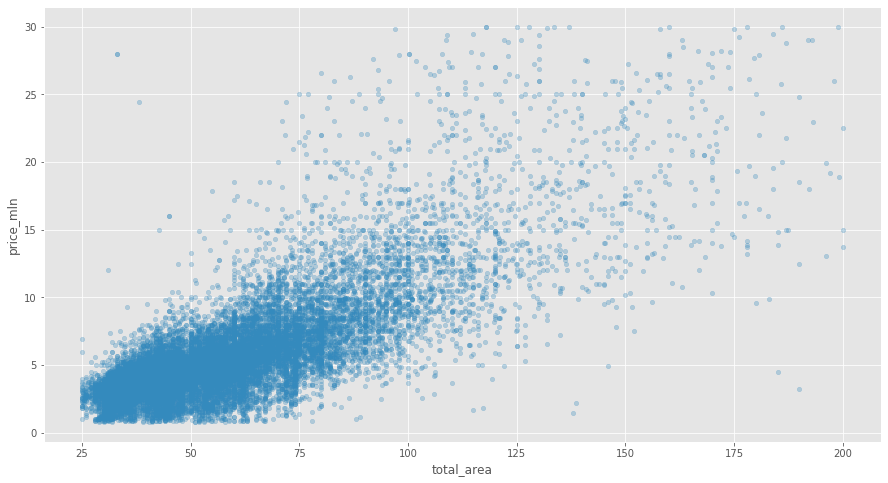

In [123]:
df_good.plot(x='total_area', 
             y='price_mln', 
             kind='scatter', 
             figsize=(15, 8), 
             grid=True, 
             alpha=0.3
            )
plt.show()

На диаграмме видна тенденция к увеличению стоимости квартиры с увеличением площади, что соответствует корреляции Пирсона. **Из этого можно сделать вывод, что при увеличении площади квартиры цена, в основном, тоже растет.**

#### Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

Для изучения взаимосвязи построим сводную таблицу и вычислим медиану для категорий этажности.

In [124]:
df_good.pivot_table(index='kind_floor', values='price_mln', aggfunc='median').sort_values('price_mln')

,price_mln
kind_floor,
первый,3.90
последний,4.25
другой,4.80


Из таблицы можно сделать вывод, что в **среднем по медиане квартиры на первом и последнем этаже стоят дешевле, чем на других этажах. При этом квартиры на последнем этаже оцениваются дороже, чем на первом**.

#### Зависимость от даты размещения: дня недели, месяца и года

Построим сводные таблицы по каждому параметру (день недели, месяц, год), а затем построим графики для наглядности.

,median,count
,price_mln,price_mln
weekday,,
0,4.60,3343
1,4.70,3843
2,4.69,3647
3,4.60,3883
4,4.55,3639
5,4.58,1785
6,4.50,1535


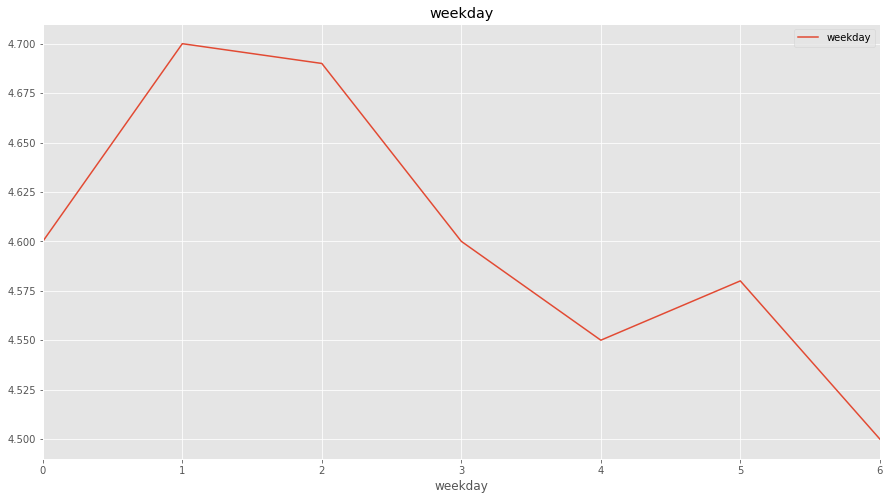

,median,count
,price_mln,price_mln
month,,
1,4.600,1362
2,4.600,2439
3,4.650,2353
4,4.775,2195
5,4.500,1182
6,4.390,1624
7,4.600,1539
8,4.570,1611


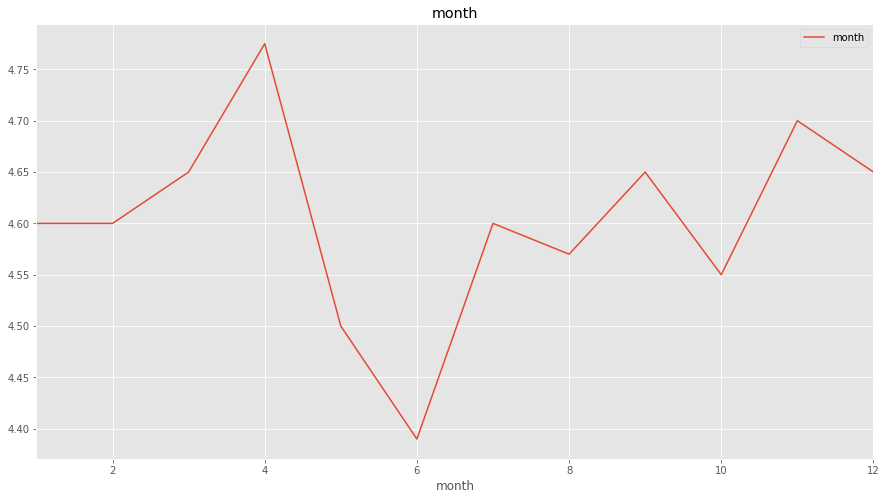

,median,count
,price_mln,price_mln
year,,
2014,7.48828,86
2015,5.05000,927
2016,4.49000,2601
2017,4.50000,7572
2018,4.59250,7868
2019,5.05000,2621


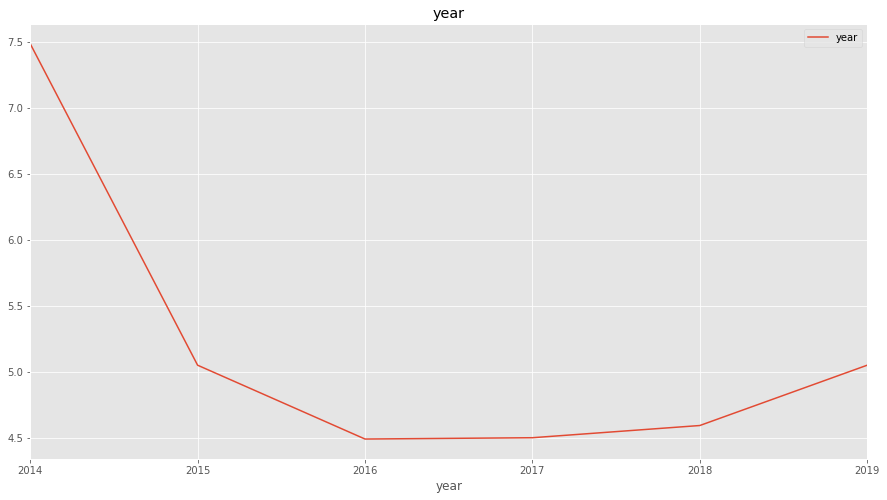

In [125]:
#автоматизируем построение сводных таблиц и графиков
check_date = ['weekday', 'month', 'year']
for i in check_date :
    display(df_good.pivot_table(index=i, values='price_mln', aggfunc=['median', 'count']))
    display(df_good.pivot_table(index=i, values='price_mln', aggfunc='median')
            .plot(title=i,
                  y='price_mln', 
                  figsize=(15, 8),
                  grid=True,
                  label=i,
                 )
           )
    plt.show()

Медианный диапазон цен в зависимости от **дня недели  - от 4,5 до 4,7 млн руб**. В диапазоне одной недели наблюдается следующая зависимость: **подъем с понедельника до максимума во вторник, спад до пятницы, небольшой рост в субботу и снова спад до минимума в воскресение**.

Медианный диапазон цен в зависимости от **месяца - от 4,39 до 4,775 млн руб**. Ежегодно наблюдается следующая тенденция: **рост с января до максимума в апреле, затем идет спад с мимнумумом в июне, после этого подъем до конца года**.


**Прямая зависимость между ценой и годом размещения объявления существует**(цена с годами растет), но только если не учитывать 2014 и 2015 гг., т.к. в те годы было мало объявлений.

### Расчет стоимости кв. метра в населённых пунктах с наибольшим числом объявлений; Поиск населённых пунктов с самой высокой и низкой стоимостью жилья

#### Расчет стоимости кв. метра в населённых пунктах с наибольшим числом объявлений

Создадим сводную таблицу по населенным пунктам и количеством объявлений.

In [126]:
top_10 = (df_good
          .pivot_table(index='locality_name', values='floor', aggfunc='count')
          .sort_values('floor',ascending=False)
          .rename(columns={'floor':'count'})
          .head(10)
         )
top_10

,count
locality_name,
Санкт-Петербург,14272
посёлок Мурино,490
посёлок Шушары,421
Всеволожск,375
Пушкин,342
Колпино,322
посёлок Парголово,305
Гатчина,294
деревня Кудрово,262


Теперь для этих населенных пунктов найдем средную цену квадратного метра.

In [127]:
df_top_10 = (df_good
             .query('locality_name in @top_10.index')
             .pivot_table(index='locality_name', values='m_2_price')
             .round()
             .sort_values('m_2_price', ascending=False)
             .join(top_10)
            )
df_top_10

,m_2_price,count
locality_name,,
Санкт-Петербург,110315.0,14272
Пушкин,102226.0,342
деревня Кудрово,91952.0,262
посёлок Парголово,89995.0,305
посёлок Мурино,84854.0,490
посёлок Шушары,78180.0,421
Колпино,75065.0,322
Всеволожск,68809.0,375
Гатчина,68791.0,294


#### Поиск населённых пунктов с самой высокой и низкой стоимостью жилья

In [128]:
print('Самый дорогой населенный пункт {}. Цена за квадратный метр в среднем составляет {:.0f} руб.'
      . format(df_top_10['m_2_price'].idxmax(), df_top_10['m_2_price'].max())
     )
print('Самый дешевый населенный пункт {}. Цена за квадратный метр в среднем составляет {:.0f} руб.'
      . format(df_top_10['m_2_price'].idxmin(), df_top_10['m_2_price'].min())
     )

Самый дорогой населенный пункт Санкт-Петербург. Цена за квадратный метр в среднем составляет 110315 руб.
Самый дешевый населенный пункт Выборг. Цена за квадратный метр в среднем составляет 58268 руб.


### Поиск центра Санкт-Петербурга

Нужно выделить квартиры в Санкт-Петербурге и посторить график изменения цены относительно приближения к центру города. Граница, где график сильно меняется и есть центральная зона.

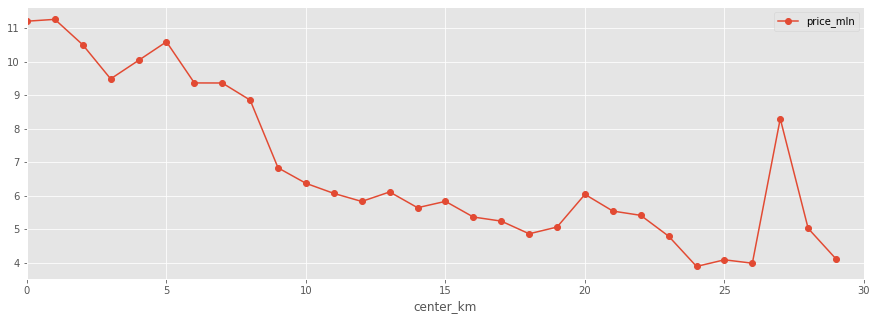

In [129]:
# выделяем квартиры в Санкт-Петергбурге
df_piter = df_good.query('locality_name == "Санкт-Петербург"')
# новый столбец с расстоянием до центра в километрах
df_piter['center_km'] = ((df_piter['city_centers_nearest'] / 1000)
                         .round()
                         .astype('Int64')
                        )
# расчет средней цены для каждого километра
df_piter_pivot = df_piter.pivot_table(index='center_km', values='price_mln').reset_index()
# график покажет, как цена зависит от удалённости от центра
df_piter_pivot.plot(x='center_km', y='price_mln', style='o-', xlim=(0, 30), grid=True, figsize=(15, 5))
plt.show()

По графику видно что **цена сильно растет c 8 км**. Эту зону можно обозначить как центральную. Также есть всплеск на расстоянии 27 км. Посмотрим чем это вызвано.

In [130]:
df_piter[df_piter['center_km'] == 27]['price_mln']

748     14.35
5961     2.25
Name: price_mln, dtype: float64

На расстоянии 27 км расположено всего две квартиры. одна за 14 млн другая за 2. Из-за этого такое большое среднее.

### Анализ параметров квартир в центре Санкт-Петербурга и факторов, влияющих на цену

Для начала сделаем срез по расстоянию от центра небольше 8 км.

In [131]:
df_piter_center = df_piter.query('center_km <= 8')

#### Анализ параметров квартир в центре Санкт-Петербурга

Теперь с помощью цикла построим гистограммы для следующих параметров: _площадь, цена, число комнат, высота потолков_. Для большей наглядности совместим гистограммы для центра и всего города.

count    3333.000000
mean       77.013081
std        32.023859
min        25.000000
25%        52.200000
50%        71.200000
75%        95.000000
max       200.000000
Name: total_area, dtype: float64


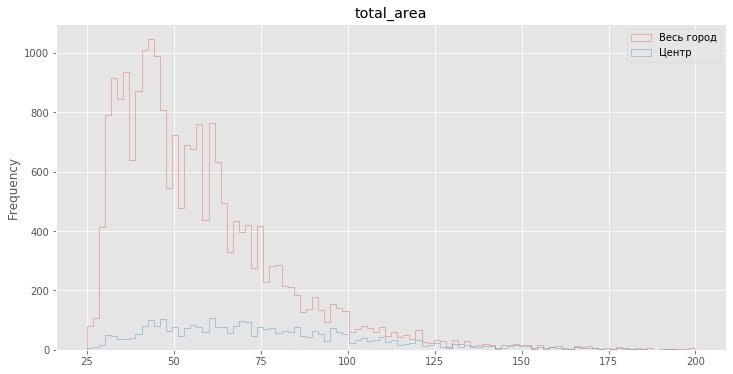

count    3333.000000
mean        9.835644
std         5.323209
min         1.800000
25%         6.200000
50%         8.350000
75%        11.900000
max        30.000000
Name: price_mln, dtype: float64


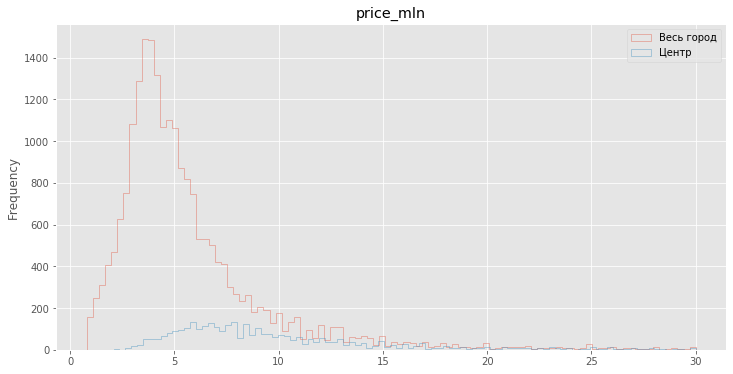

count    3333.000000
mean        2.518452
std         1.040609
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64


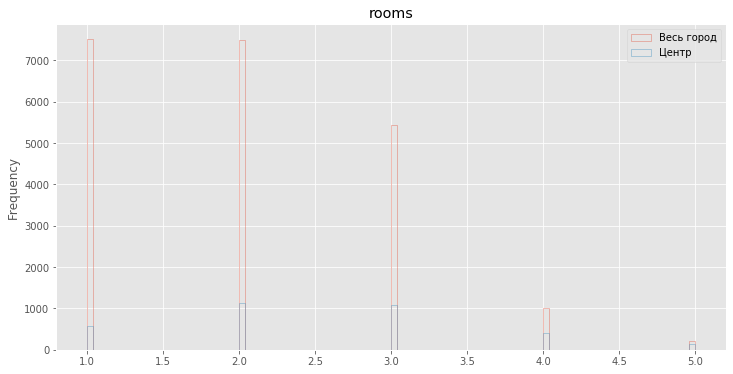

count    2098.000000
mean        2.966325
std         0.268189
min         2.400000
25%         2.750000
50%         3.000000
75%         3.160000
max         3.500000
Name: ceiling_height, dtype: float64


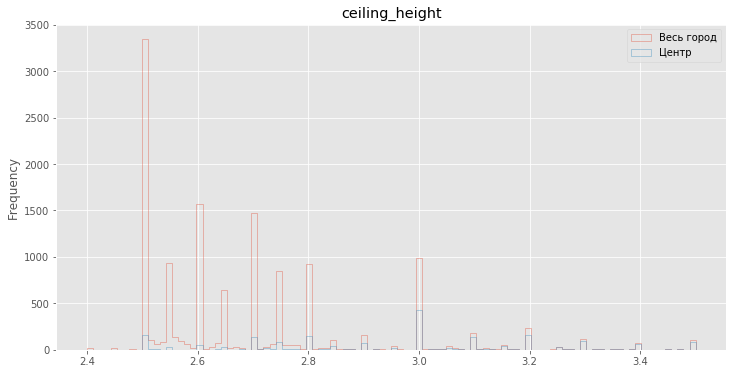

In [132]:
# создаем список параметров
checklist = ['total_area', 'price_mln', 'rooms', 'ceiling_height']
# автоматизируем создание гистограмм и описательной статистики с помощью цикла
for i in checklist:
    print(df_piter_center[i].describe())
    #гистограмма для всего города - второй график
    ax = df_good.plot(kind='hist', 
                      y=i, 
                      histtype='step', 
                      alpha=0.7, 
                      bins=100, 
                      figsize=(12, 6), 
                      label='Весь город'
                     )
    #гистограмма для центра - второй график
    df_piter_center.plot(title=i, 
                         kind='hist', 
                         y=i, 
                         histtype='step', 
                         alpha=0.7, 
                         bins=100, 
                         ax=ax, 
                         figsize=(12, 6), 
                         label='Центр'
                        )
    plt.show()

**Площадь**. В центре квартиры имеют в основном большую площадь (медиана 71.5 $м^2$), чем во всем городе.<br>
**Цена**. Цена  в центре так же в среднем выше, с медианой 8.35 млн руб.<br>
**Количество комнат**. В центре больше 2-хкомнатных и 3-хкомнатных квартир. За центром преобладают квартиры с одной и двумя комнатами.<br>
**Высота потолков**. 2,7 метра - основная высота потолков в центре, затем 3 метра. Вне центра распределение такое же.

#### Анализ факторов, влияющих на стоимость квартиры в центре Санкт-Петербурге

Для начала найдем корреляцию между ценой и количеством комнат и близостью центра.

In [133]:
df_piter_center[['price_mln', 'rooms', 'city_centers_nearest']].corr()

,price_mln,rooms,city_centers_nearest
price_mln,1.000000,0.430534,-0.095014
rooms,0.430534,1.000000,-0.212489
city_centers_nearest,-0.095014,-0.212489,1.000000


Корреляция видна только для количества комнат. Корреляции между ценой и близостью к центру практически отсутствует. Визуализируем данные.

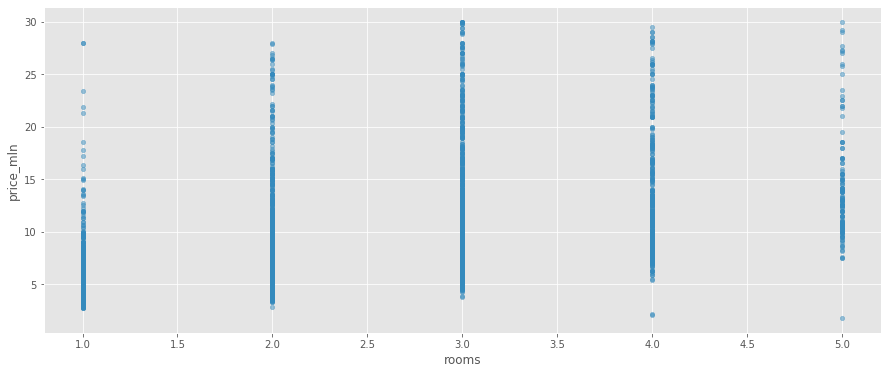

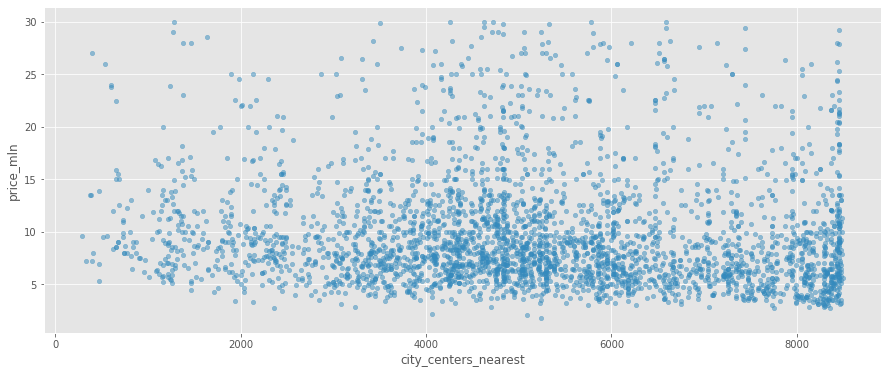

In [134]:
piter_factor = ['rooms', 'city_centers_nearest']
for i in piter_factor:
    df_piter_center.plot(x=i, 
                     y='price_mln', 
                     kind='scatter', 
                     figsize=(15, 6), 
                     grid=True, 
                     alpha=0.5
                    )


Также визуализируем взаимосвязь цены и даты публикации (день недели, месяц, год).

,median,count
,price_mln,price_mln
weekday,,
0,8.500,498
1,8.175,580
2,8.500,584
3,8.300,656
4,8.445,570
5,7.820,255
6,8.524,190


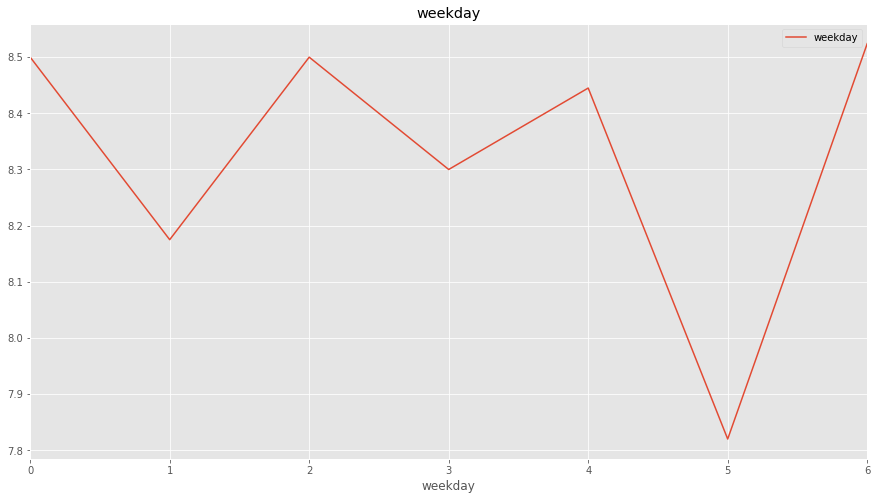

,median,count
,price_mln,price_mln
month,,
1,8.3000,199
2,8.3000,345
3,8.5000,355
4,8.2000,327
5,8.3000,198
6,8.0000,268
7,8.6000,254
8,8.1000,257


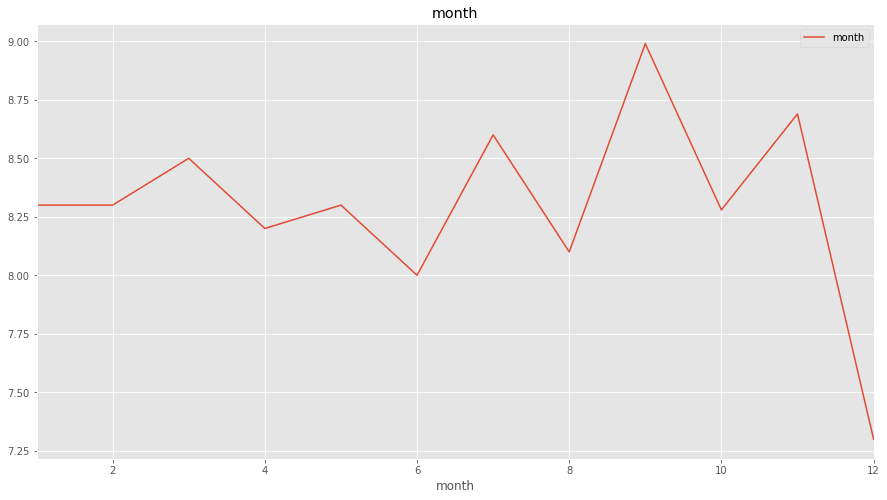

,median,count
,price_mln,price_mln
year,,
2014,9.9900,19
2015,8.3000,225
2016,8.5500,471
2017,8.2175,1208
2018,8.2900,1051
2019,8.5000,359


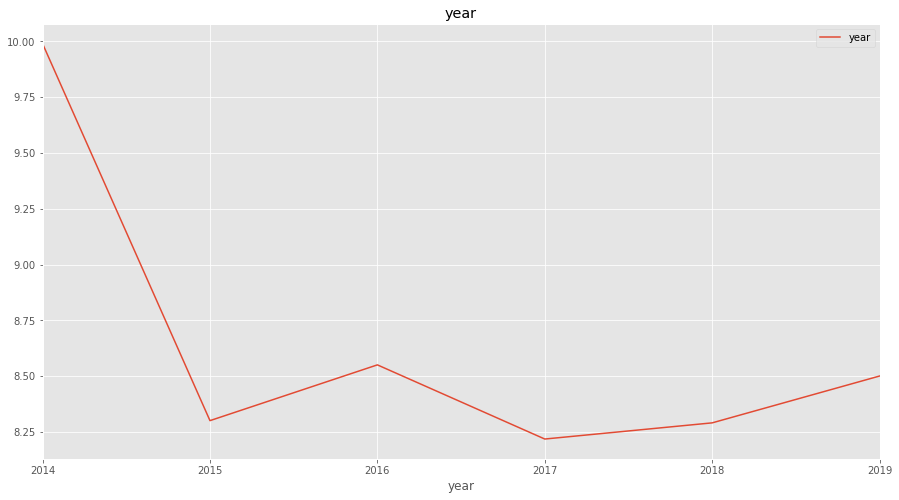

In [135]:
#автоматизируем построение сводных таблиц и графиков
check_date = ['weekday', 'month', 'year']
for i in check_date :
    display(df_piter_center.pivot_table(index=i, values='price_mln', aggfunc=['median', 'count']))
    display(df_piter_center.pivot_table(index=i, values='price_mln', aggfunc='median')
            .plot(title=i,
                  y='price_mln', 
                  figsize=(15, 8),
                  grid=True,
                  label=i,
                 )
           )
    plt.show()

#### Вывод

Если сравнивать со всем городом можно сказать следующее:
* С увеличением количества комнат заметен рост числа квартир стоимостью свыше 15 млн руб (весь город - свыше 10 млн руб.).
* Зависимости цены от расстояния до центра не обнаружено. При этом по всему городу наблюдалась тенденция увеличения количества дорогих квартир при приближении к центру.
* В течении недели цена различается не сильно, есть спад в субботу.
* В течении года цена варьируется от 8 до 9 млн руб. с ощутимым спадом в декабре до 7,3 млн руб.
* Зависимости цена/год публикации в центре и по всему городу похожи. Цена с годами растет но только начиная с 2017.


## Общий вывод

Был проведен анализ архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Проанализированы параметры для всех населенных пунктов и для центра Санкт-Петербурга.

**Вывод для всех населенных пунктов**:
* Большое количество квартир ценой до 5 млн.руб располагается как вблизи так и вдали от центра. Но при этом чем ближе к центру, тем больше становится квартир стоимостью более 5 млн. руб. А практически все квартиры ценой свыше 10 млн. руб. располагаются на расстоянии до 20 км. Большинство квартир ценой свыше 20 млн. руб. в 10 км от центра. Таким образом, можно сделать вывод: **чем ближе к центру, тем больше дорогих квартир**.
* Большинство квартир стоят меньше 10 млн руб. При этом **с увеличением комнат заметен рост числа квартир стоимостью свыше 10 млн руб**.
* **При увеличении площади квартиры цена, в основном, тоже растет.**
* В среднем по медиане **квартиры на первом и последнем этаже стоят дешевле, чем на других этажах. При этом квартиры на последнем этаже оцениваются дороже, чем на первом.**
* Медианный диапазон цен в зависимости от **дня недели  - от 4,5 до 4,7 млн руб**. В диапазоне одной недели наблюдается следующая зависимость: **подъем с понедельника до максимума во вторник, спад до пятницы, небольшой рост в субботу и снова спад до минимума в воскресение**.
* Медианный диапазон цен в зависимости от **месяца - от 4,39 до 4,775 млн руб**. Ежегодно наблюдается следующая тенденция: **рост с января до максимума в апреле, затем идет спад с мимнумумом в июне, после этого подъем до конца года**.
* **Прямая зависимость между ценой и годом размещения объявления существует**(цена с годами растет), но только если не учитывать 2014 и 2015 гг., т.к. в те годы было мало объявлений.

**Вывод для центра Санкт-Петербурга**:
* В центре квартиры имеют в основном большую площадь (медиана 71.5 $м^2$), чем во всем городе.
* Цена  в центре так же в среднем выше, с **медианой 8.35 млн руб**.
* В центре **больше 2-хкомнатных и 3-хкомнатных квартир**. За центром преобладают квартиры с одной и двумя комнатами.
* **2,7 метра** - основная высота потолков в центре, затем 3 метра. Вне центра распределение такое же.
* С увеличением количества комнат заметен рост числа квартир стоимостью свыше 15 млн руб 
* Зависимости цены от расстояния до центра не обнаружено.
* В течении недели цена различается не сильно, есть спад в субботу.
* В течении года цена варьируется от 8 до 9 млн руб. с ощутимым спадом в декабре до 7,3 млн руб.
* Зависимости цена/год публикации в центре и по всему городу похожи. Цена с годами растет но только начиная с 2017.

Самый дорогой населенный пункт Санкт-Петербург. Цена за квадратный метр в среднем составляет 110315 руб.<br>
Самый дешевый населенный пункт Выборг. Цена за квадратный метр в среднем составляет 58268 руб.